***Описание переменных***

시도	- город, номинальная

시군구 (그룹) - район/округ, номинальная

성별	- разделение по полу, бинарная

총합계 - общее, числовая

далее - сферы бизнеса, в которых заняты иностранцы, числовые

Источник данных: https://www.immigration.go.kr/immigration/1569/subview.do?enc=Zm5jdDF8QEB8JTJGYmJzJTJGaW1taWdyYXRpb24lMkYyMjclMkY1OTcyMTElMkZhcnRjbFZpZXcuZG8lM0ZwYXNzd29yZCUzRCUyNnJnc0JnbmRlU3RyJTNEJTI2YmJzQ2xTZXElM0QlMjZyZ3NFbmRkZVN0ciUzRCUyNmlzVmlld01pbmUlM0RmYWxzZSUyNnBhZ2UlM0QyJTI2YmJzT3BlbldyZFNlcSUzRCUyNnNyY2hDb2x1bW4lM0QlMjZzcmNoV3JkJTNEJTI2

(Данные актуальны на июнь 2025 г.)

***Исследовательский вопрос***

В каких сферах бизнеса наиболее активны различные диаспоры?

***Обработка данных***

Импортируем данные и смотрим их количество

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('иностранцы в корее.xlsx')
data.shape

(757, 219)

Смотрим сами данные

In [2]:
data.head()

,시도,시군구 (그룹),성별,총합계,D1-00(문화예술),D2-0F(교환학생),D2-01(전문학사),D2-02(학사유학),D2-03(석사유학),D2-04(박사유학),...,F6-02(자녀양육자),F6-03(혼인단절자),G1-08(국내출생고교졸업자),G1-12(인도적체류자가족),G1-14(영유아기가지나입국한고교졸업자),G1-15(재학아동의미성년형제자매),G1-81(국내출생아동양육),G1-82(영유아기입국아동양육),G1-83(영유아기가지나입국한아동양육),기타(others)
0,총합계,총계,총계,1559975,44.0,1.0,24032.0,91847.0,40361.0,22087.0,...,5265.0,4346.0,7.0,548.0,4.0,81.0,1183.0,409.0,71.0,32865
1,경기도,가평군,총계,1317,NaN,NaN,9.0,21.0,8.0,6.0,...,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,경기도,가평군,남성,600,NaN,NaN,6.0,13.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,경기도,가평군,여성,717,NaN,NaN,3.0,8.0,4.0,2.0,...,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,경기도,고양시 덕양구,총계,5839,1.0,NaN,38.0,446.0,175.0,313.0,...,11.0,14.0,NaN,2.0,NaN,NaN,3.0,NaN,NaN,76


Заметим, что для каждого района/округа представлено по три строки -- мужчины, женщины и общее число. Так как наше исследование не касается полового раздделения, попробуем удалить строки по группам:

In [3]:
data = data[(data['성별'] != '남성') & (data['성별'] != '여성')]

Теперь заметим, что города у нас разбиты по округам/районам. Было бы неплохо привести все к усредненным значениям для каждого города, но не округа.

In [4]:
# Уточняем название столбца с городами 
city_column = '시도' 

# Группируем по городам
data_cities = data.groupby(city_column).sum(numeric_only=True).reset_index()

data_cities.shape

(18, 217)

Проверим пропуски по колонкам, т.к. при большом количество пропусков анализ может быть неполноценным.

In [5]:
data_cities.isna().mean()

시도                       0.0
총합계                      0.0
D1-00(문화예술)              0.0
D2-0F(교환학생)              0.0
D2-01(전문학사)              0.0
                        ... 
G1-15(재학아동의미성년형제자매)      0.0
G1-81(국내출생아동양육)          0.0
G1-82(영유아기입국아동양육)        0.0
G1-83(영유아기가지나입국한아동양육)    0.0
기타(others)               0.0
Length: 217, dtype: float64

Отлично, пропусков нет => можно приступать к анализу.
(Хотя на будущее: отсутствие пропусков в целом выглядит очень подозрительно.)

***Анализ данных***

In [6]:
data_cities.columns.tolist()

['시도',
 '총합계',
 'D1-00(문화예술)',
 'D2-0F(교환학생)',
 'D2-01(전문학사)',
 'D2-02(학사유학)',
 'D2-03(석사유학)',
 'D2-04(박사유학)',
 'D2-05(연구유학)',
 'D2-06(교환학생)',
 'D2-07(일-학습연계 유학)',
 'D3-01(해투기술연수)',
 'D3-11(해외직접)',
 'D3-12(기술수출)',
 'D4-01(대학부설어학원연수)',
 'D4-02(기타기관연수)',
 'D4-03(초중고생)',
 'D4-04(동포연수)',
 'D4-06(사설기관연수)',
 'D4-07(외국어연수)',
 'D5-00(취재)',
 'D6-00(종교)',
 'D7-01(외국기업)',
 'D7-02(내국기업)',
 'D7-92(FTA계약)',
 'D8-01(법인에 투자)',
 'D8-03(개인기업투자)',
 'D8-04(기술창업)',
 'D9-01(무역고유거래)',
 'D9-02(수출설비)',
 'D9-03(선박설비)',
 'D9-04(경영영리사업)',
 'D9-05(유학무역 경영)',
 'D10-01(구직활동)',
 'D10-02(기술창업활동)',
 'E1-00(교수)',
 'E2-01(일반회화강사)',
 'E2-02(학교보조교사)',
 'E3-00(연구)',
 'E4-00(기술지도)',
 'E5-00(전문직업)',
 'E6-01(예술연예)',
 'E6-02(호텔유흥)',
 'E6-03(운    동)',
 'E7-01(전문인력)',
 'E7-02(준전문인력)',
 'E7-03(일반기능인력)',
 'E7-04(숙련기능인력)',
 'E8-01(농업장기)',
 'E8-02(농업장기)',
 'E9-01(제 조 업)',
 'E9-02(건 설 업)',
 'E9-03(농  업)',
 'E9-04(어    업)',
 'E9-05(서비스업)',
 'E9-95(과거추천연수)',
 'E9-96(과거연수취업)',
 'E9-97(과거특례고용)',
 'E9-98(과거합법조치)',
 'E10-01(내항선원)',
 'E10-02

***Специальности:***

«D1-00 (Культура и искусство)»,
«D3-11 (Прямые зарубежные поставки)»,
«D3-12 (Экспорт технологий)»,
«D4-03 (Учащиеся начальной, средней и старшей школы)»,
«D5-00 (Отчётность)»,
«D6-00 (Религия)»,
«D7-01 (Иностранные компании)»,
«D7-02 (Отечественные компании)»,
«D7-92 (Соглашение о свободной торговле)»,
«D8-01 (Инвестиции в корпорации)»,
«D8-03 (Инвестиции в индивидуальные предприятия)»,
«D8-04 (Технологические стартапы)»,
«D9-01 (Торгово-специфические сделки)»,
«D9-02 (Экспорт оборудования)»,
«D9-03 (Судоходство Оборудование)»,
«D9-04 (Коммерческий бизнес)»,
«D10-01 (Поиск работы)»,
«D10-02 (Деятельность в области технологического предпринимательства)»,
«E1-00 (Профессор)»,
«E2-01 (Преподаватель общей разговорной речи)»,
«E3-00 (Исследования)»,
«E4-00 (Техническое руководство)»,
«E5-00 (Профессиональная деятельность)»,
«E6-01 (Искусство и развлечения)»,
«E6-02 (Развлечения в гостиницах)»,
«E6-03 (Спорт)»,
«E7-01 (Профессиональные работники)»,
«E7-02 (Полупрофессиональные работники)»,
«E7-03 (Общеквалифицированные (рабочие)',
'E7-04 (Квалифицированные рабочие)',
'E8-01 (Сельскохозяйственная долгосрочная занятость)',
'E8-02 (Сельскохозяйственная долгосрочная занятость)',
'E9-01 (Производство)',
'E9-02 (Строительство)',
'E9-03 (Сельское хозяйство)',
'E9-04 (Рыболовство)',
'E9-05 (Сфера услуг)',
'E9-97 (Специальная занятость в прошлом)',
'E9-98 (В прошлом судебные меры)',
'E10-01 (Моряки, работающие в стране)',
'E10-02 (Моряки, работающие в рыболовстве)',
'E10-03 (Моряки, работающие в круизных лайнерах)',
'F1-01 (Гостевое сожительство)',
'F1-03 (Дипломатическая (совместное проживание)»,
«F1-06 (Брак и ведение домашнего хозяйства)»,
«F1-07 (Заявление на получение гражданства)»,
«F1-08 (Законнорожденные дети)»,
«F1-09 (Супруги корейцев, проживающих за рубежом, и т. д.)»,
«F1-11 (Дети приезжих работников)»,
«F1-12 (Супруги, проживающие в стране, и т. д.)»,
«F1-15 (Родители высокоодаренных людей и т. д.)»,
«F1-16 (Члены семей лиц, признанных беженцами)»,
«F1-21 (Дипломатическая помощь в ведении домашнего хозяйства)»,
«F1-22 (Помощь в ведении домашнего хозяйства на крупные суммы)»,
«F1-24 (Профессиональная помощь в ведении домашнего хозяйства)»,
«F1-25 (Временная помощь для лиц, проживающих за рубежом) Корейцы четвертого поколения и старше),

F1-28 (Иностранные члены семьи натурализованных граждан),

F1-52 (Неусыновленные несовершеннолетние, въезжающие в страну через центр страны),

F1-71 (Члены семьи, подающие заявление на получение гражданства),

F1-72 (Члены семьи, подающие заявление на постоянное место жительства),

F1-99 (Иное сожительство),

F2-01 (Супруги-корейцы)),

F2-03 (Члены семьи постоянных жителей)),

F2-04 (Беженцы)),

F2-05 (Крупные инвестиции)),

F2-06 (Квалифицированные специалисты)),

F2-07 (Персонал с высоким рейтингом)),

F2-08 (Инвестиции в недвижимость)),

F2-09 (Утрата постоянного места жительства)»,

F2-11 (Назначение на государственную службу)»,

F2-12 (Инвестиции в государственную службу)»,

F2-13 (Член семьи, вышедший на пенсию на государственной службе)»,

F2-14 (Инвестиции в пенсионную иммиграционную программу)»,

F2-71 (Член семьи, получивший балл)»,

F2-81 (Член семьи иммигранта)»,

F2-99 (Другое долгосрочное)»,

F3-01 (Сопровождающее лицо)»,

F5-01 (Долгосрочное пребывание)»,

F5-04 (Постоянный член семьи)»,

F5-05 (Крупные инвестиции)»,

F5-06 (Корейцы, проживающие за рубежом, 2 года)»,

F5-07 (Требования к гражданству Кореи, проживающей за рубежом)»,

F5-08 (Китайцы, проживающие в Корее)»,

F5-09 (Продвинутая программа докторантуры)»,

F5-11 (Особые способности)»,

F5-12 (Особые заслуги)»,

F5-13 (Пенсионное обеспечение)»,

F5-14 (4 года стажировки)»,

F5-15 (Докторантура в Корее)»,

F5-16 (Система баллов)»,

F5-17 (Инвестиции в недвижимость)»,

F5-18 (Семья, начисляющая баллы)»,

F5-19 (Семья, проживающая в Корее)»,

F5-20 (Рождение постоянного жителя)»,

F5-21 (Инвестиции в государственную службу)»,

F5-22 (Семья пенсионера, работающего в государственной службе)»,

F5-23 (Иммиграция пенсионеров) Инвестиции),

F5-25 (Условное постоянное место жительства для крупных инвестиций),

F5-27 (Постоянное место жительства для лиц, признанных беженцами),

G1-0M (Медицинский туризм),

G1-01 (Компенсация за несчастный случай на производстве),

G1-02 (Несчастный случай с заболеванием),

G1-03 (Судебное разбирательство),

G1-04 (Арбитраж),

G1-05 (Заявление о предоставлении статуса беженца),

G1-06 (Признание статуса беженца),

G1-09 (Беременность и роды),

G1-10 (Лечение и уход),

G1-11 (Жертвы сексуальной эксплуатации),

G1-19 (Временная сезонная работа в связи с COVID-19)',
'G1-99 (Другое)',
'H1-00 (Туризм)',
'H2-01 (Вывоз мази)',
'H2-03 (Добровольная депортация)',
'H2-05 (Депортация по лотерее)',
'H2-06 (Измененная депортация)',
'H2-07 (Депортация по истечении срока действия)',
'H2-11 (Депортация по мази)',
'H2-12 (Депортация по мази)',
'H2-51 (Депортация по лотерее)',
'H2-52 (Депортация по лотерее)',
'H2-61 (Измененная депортация)',
'H2-62 (Измененная депортация)',
'H2-71 (Депортация по истечении срока действия Депортация),

H2-72 (Измененная депортация),

H2-91 (Другая депортация),

H2-92 (Другая депортация),

H2-99 (Другая депортация),

D8-4S (Специальная виза для стартапов в сфере технологий)

D10-03 (Стажер в сфере передовых технологий)

E7-0Y (Таланты для развития внутреннего рынка)

E7-4R (Региональные специалисты)

E7-S1 (Высокооплачиваемый работник с отрицательным балансом)

E7-S2 (Система отрицательных баллов для высокотехнологичных полевых работников)

E8-03 (Рыболовство, долгосрочная виза)

E8-04 (Рыболовство, долгосрочная виза)

E8-05 (Сельское хозяйство (Долгосрочная)',
'E8-07 (Сельское хозяйство (Долгосрочная)',
'E8-99 (Помощник сезонного рабочего)',
'E9-09 (Лесное хозяйство)',
'E9-10 (Горнодобывающая промышленность)',
'F1-0D (Работа)',
'F1-0R (Региональная специализированная региональная помощь для сопровождающего члена семьи)',
'F1-9R (Региональная специализированная корейская семья)',
'F1-05 (Семья иммигрантов, вступивших в брак)',
'F2-0R (Региональная специализированная региональная помощь для сопровождающего)',
'F2-7S (Вид на жительство потенциального таланта)',
'F2-02 (Иностранные дети граждан Кореи)',
'F2-15 (Специалист по уходу за взрослыми детьми)',
'F2-16 (Специальный спонсор)',
'F3-1R (Региональная семья талантов)»,
«F3-2R (Региональная корейская семья)»,
«F3-3R (Региональная семья квалифицированных специалистов)»,
«F3-02 (Культура и искусство)»,
«F3-05 (Репортаж)»,
«F3-06 (Религия)»,
«F3-07 (Резидентура)»,
«F3-08 (Корпоративные инвестиции)»,
«F3-09 (Управление торговлей)»,
«F3-10 (Соискатель)»,
«F3-11 (Профессор)»,
«F3-12 (Разговорное обучение)»,
«F3-13 (Исследования)»,
«F3-14 (Техническое обучение)»,
«F3-15 (Профессиональная деятельность)»,
«F3-16 (Искусство и (Развлечения)»,
«F3-17 (Специальные мероприятия)»,
«F3-18 (Член семьи, проживающий за рубежом)»,
«F3-19 (Член семьи, проживающий за рубежом, кореец)»,
«F3-20 (Член семьи, приезжающий на работу)»,
«F3-74 (Член семьи, приезжающий за границу, квалифицированный работник)»,
«F3-91 (Сопровождающее лицо, приезжающее по программе FTA)»,
«F5-6R (Региональное специализированное постоянное место жительства корейцев за рубежом)»,
«F5-02 (Супруга/супруг гражданина Кореи)»,
«F5-03 (Несовершеннолетние дети гражданина Кореи)»,
«F5-24 (Постоянное место жительства для корпораций)»,
«F5-S1 (Постоянное место жительства для потенциально талантливых лиц)»,
«F6-01 (Супруга/супруг(а) корейца)»,
«F6-02 (Ребенок Опекун)»,
«F6-03 (Расторжение брака)»,
«G1-08 (Выпускники средней школы, родившиеся в Корее)»,
«G1-12 (Семья с гуманитарным статусом)»,
«G1-14 (Выпускники средней школы, въехавшие в Корею после младенчества)»,
«G1-81 (Уход за детьми, родившимися в Корее)»,
«G1-82 (Уход за детьми, въехавшими в Корею после младенчества)»,
«G1-83 (Уход за детьми, въехавшими в Корею после младенчества)»,
«Другое»

'D8-04(기술창업)'


In [7]:
data_cities.shape

(18, 217)

Так как наше исследование касается сферы бизнеса, то стоит удалить столбцы, описывающие иностранцев в Корее, которые не принимают участие в деловой жизни. Будем удалять столбцы, в названиях которых встречаются слог 학 и слово 연수.

In [8]:
dс_cleaned = data_cities.loc[:, ~data_cities.columns.str.contains('학|연수|F|H|G', case=False)]

In [9]:
dс_cleaned.shape

(18, 56)

Получается, наша статистика содержит информацию по 56 сферам бизнеса в 18 городах Республики Корея, в которых работаю иностранцы. Изучим эти сферы:

In [10]:
dс_cleaned.head(18)

,시도,총합계,D1-00(문화예술),D3-11(해외직접),D3-12(기술수출),D4-03(초중고생),D5-00(취재),D6-00(종교),D7-01(외국기업),D7-02(내국기업),...,E7-4R(지역특화숙련기능인력),E7-S1(네거티브고소득자),E7-S2(네거티브첨단분야종사자점수제),E8-03(어업장기),E8-04(어업장기),E8-05(농업장기),E8-07(농업장기),E8-99(계절근로보조인력),E9-09(임업),E9-10(광업)
0,강원특별자치도,32447,0.0,0.0,0.0,4.0,0.0,37.0,2.0,0.0,...,9.0,0.0,0.0,6.0,7.0,13.0,0.0,3.0,24.0,5.0
1,경기도,483350,5.0,95.0,0.0,42.0,5.0,510.0,74.0,79.0,...,72.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0
2,경상남도,106869,0.0,154.0,5.0,15.0,0.0,74.0,79.0,2.0,...,71.0,0.0,0.0,10.0,34.0,0.0,0.0,1.0,0.0,0.0
3,경상북도,86637,2.0,12.0,0.0,139.0,0.0,83.0,2.0,3.0,...,54.0,0.0,0.0,6.0,48.0,5.0,0.0,3.0,6.0,2.0
4,광주광역시,27204,0.0,10.0,0.0,4.0,0.0,39.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,대구광역시,37776,0.0,6.0,0.0,10.0,0.0,70.0,5.0,0.0,...,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,대전광역시,27221,0.0,0.0,0.0,16.0,0.0,19.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,부산광역시,57448,2.0,12.0,0.0,35.0,1.0,103.0,79.0,9.0,...,2.0,3.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0
8,서울특별시,269893,27.0,5.0,0.0,175.0,131.0,416.0,513.0,15.0,...,0.0,30.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,세종특별자치시,6417,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [11]:
dс_cleaned.columns.tolist()

['시도',
 '총합계',
 'D1-00(문화예술)',
 'D3-11(해외직접)',
 'D3-12(기술수출)',
 'D4-03(초중고생)',
 'D5-00(취재)',
 'D6-00(종교)',
 'D7-01(외국기업)',
 'D7-02(내국기업)',
 'D8-01(법인에 투자)',
 'D8-03(개인기업투자)',
 'D8-04(기술창업)',
 'D9-01(무역고유거래)',
 'D9-02(수출설비)',
 'D9-03(선박설비)',
 'D9-04(경영영리사업)',
 'D10-01(구직활동)',
 'D10-02(기술창업활동)',
 'E1-00(교수)',
 'E2-01(일반회화강사)',
 'E3-00(연구)',
 'E4-00(기술지도)',
 'E5-00(전문직업)',
 'E6-01(예술연예)',
 'E6-02(호텔유흥)',
 'E6-03(운    동)',
 'E7-01(전문인력)',
 'E7-02(준전문인력)',
 'E7-03(일반기능인력)',
 'E7-04(숙련기능인력)',
 'E8-01(농업장기)',
 'E8-02(농업장기)',
 'E9-01(제 조 업)',
 'E9-02(건 설 업)',
 'E9-03(농  업)',
 'E9-04(어    업)',
 'E9-05(서비스업)',
 'E9-97(과거특례고용)',
 'E9-98(과거합법조치)',
 'E10-01(내항선원)',
 'E10-02(어 선 원)',
 'E10-03(순항선원)',
 'D8-4S(기술창업특별비자)',
 'D10-03(첨단기술인턴)',
 'E7-0Y(국내성장인력)',
 'E7-4R(지역특화숙련기능인력)',
 'E7-S1(네거티브고소득자)',
 'E7-S2(네거티브첨단분야종사자점수제)',
 'E8-03(어업장기)',
 'E8-04(어업장기)',
 'E8-05(농업장기)',
 'E8-07(농업장기)',
 'E8-99(계절근로보조인력)',
 'E9-09(임업)',
 'E9-10(광업)']

***Интересные показатели***


1/ В каких сферах задействовано наибольшее количество иностранцев? В каких меньшее?

2/ D7-01(외국기업) & D7-02(내국기업): В каком отношении иностранцы задейстованы в корейских и международных компаниях?

3/ E7-01(전문인력), E7-02(준전문인력), E7-03(일반기능인력), E7-04(숙련기능인력): Каково отношение специализированного и квалифицированного персонала и общей и квалифицированной рабочей силы?

***Визуализация***

In [11]:
dс_cleaned

,시도,총합계,D1-00(문화예술),D3-11(해외직접),D3-12(기술수출),D4-03(초중고생),D5-00(취재),D6-00(종교),D7-01(외국기업),D7-02(내국기업),...,E7-4R(지역특화숙련기능인력),E7-S1(네거티브고소득자),E7-S2(네거티브첨단분야종사자점수제),E8-03(어업장기),E8-04(어업장기),E8-05(농업장기),E8-07(농업장기),E8-99(계절근로보조인력),E9-09(임업),E9-10(광업)
0,강원특별자치도,32447,0.0,0.0,0.0,4.0,0.0,37.0,2.0,0.0,...,9.0,0.0,0.0,6.0,7.0,13.0,0.0,3.0,24.0,5.0
1,경기도,483350,5.0,95.0,0.0,42.0,5.0,510.0,74.0,79.0,...,72.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0
2,경상남도,106869,0.0,154.0,5.0,15.0,0.0,74.0,79.0,2.0,...,71.0,0.0,0.0,10.0,34.0,0.0,0.0,1.0,0.0,0.0
3,경상북도,86637,2.0,12.0,0.0,139.0,0.0,83.0,2.0,3.0,...,54.0,0.0,0.0,6.0,48.0,5.0,0.0,3.0,6.0,2.0
4,광주광역시,27204,0.0,10.0,0.0,4.0,0.0,39.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,대구광역시,37776,0.0,6.0,0.0,10.0,0.0,70.0,5.0,0.0,...,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,대전광역시,27221,0.0,0.0,0.0,16.0,0.0,19.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,부산광역시,57448,2.0,12.0,0.0,35.0,1.0,103.0,79.0,9.0,...,2.0,3.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0
8,서울특별시,269893,27.0,5.0,0.0,175.0,131.0,416.0,513.0,15.0,...,0.0,30.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,세종특별자치시,6417,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Сначала посмотрим в целом распределение иностранных работников по городам Республики Корея, но уберем строку "общее".

In [13]:
# Удалить строки по индексам, удовлетворяющим условию
dc_1 = dс_cleaned.drop(dс_cleaned[dс_cleaned['시도'] == '총합계'].index)

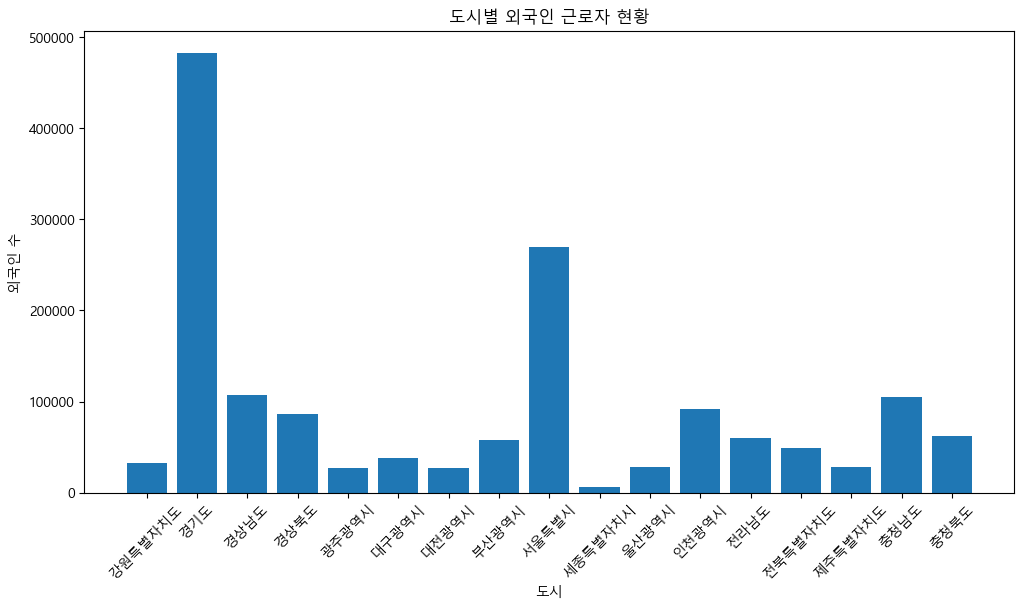

In [14]:
# Если нужно сгруппировать по категориям
import matplotlib.pyplot as plt

# Настройка шрифта
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

dс_grouped = dc_1.groupby('시도')['총합계'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(dс_grouped['시도'], dс_grouped['총합계'])
plt.xlabel('도시')
plt.ylabel('외국인 수')
plt.title('도시별 외국인 근로자 현황')
plt.xticks(rotation=45)
plt.show()

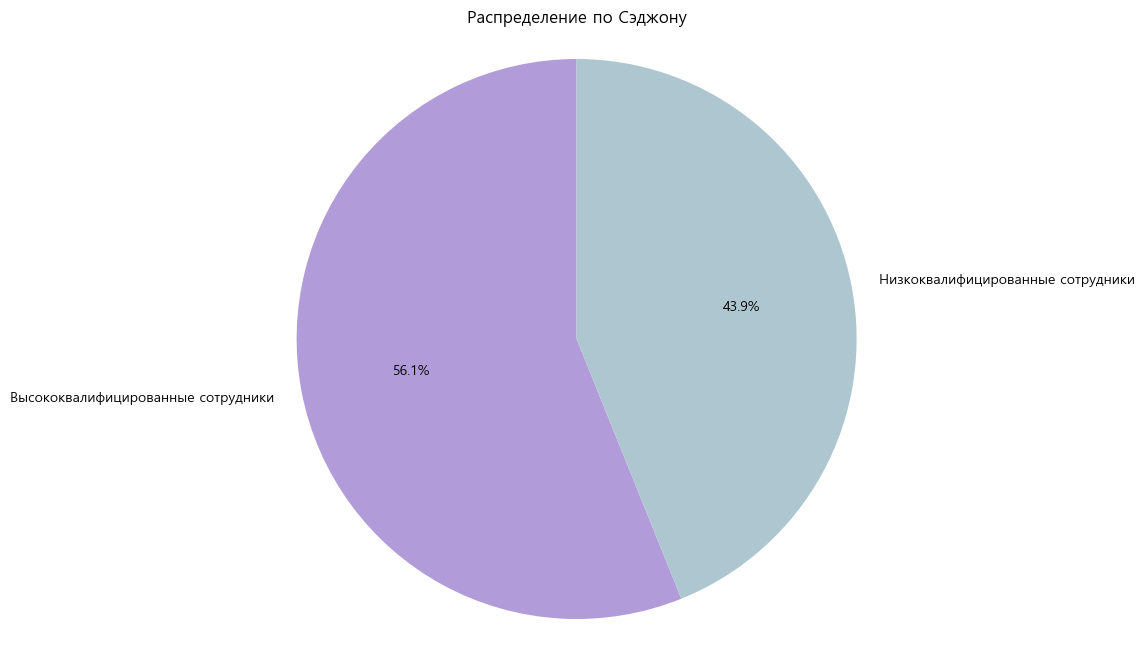

In [15]:
# Общее распределение по стране
totals = [dc_1['E7-01(전문인력)'].sum(), dc_1['E7-02(준전문인력)'].sum()]
labels = ['Высококвалифицированные сотрудники', 'Низкоквалифицированные сотрудники']
colors = ['#B19CD9', '#AEC6CF']

plt.figure(figsize=(10, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Распределение по Сэджону')
plt.axis('equal')
plt.show()

#E7-01(전문인력), E7-02(준전문인력), E7-03(일반기능인력), E7-04(숙련기능인력)

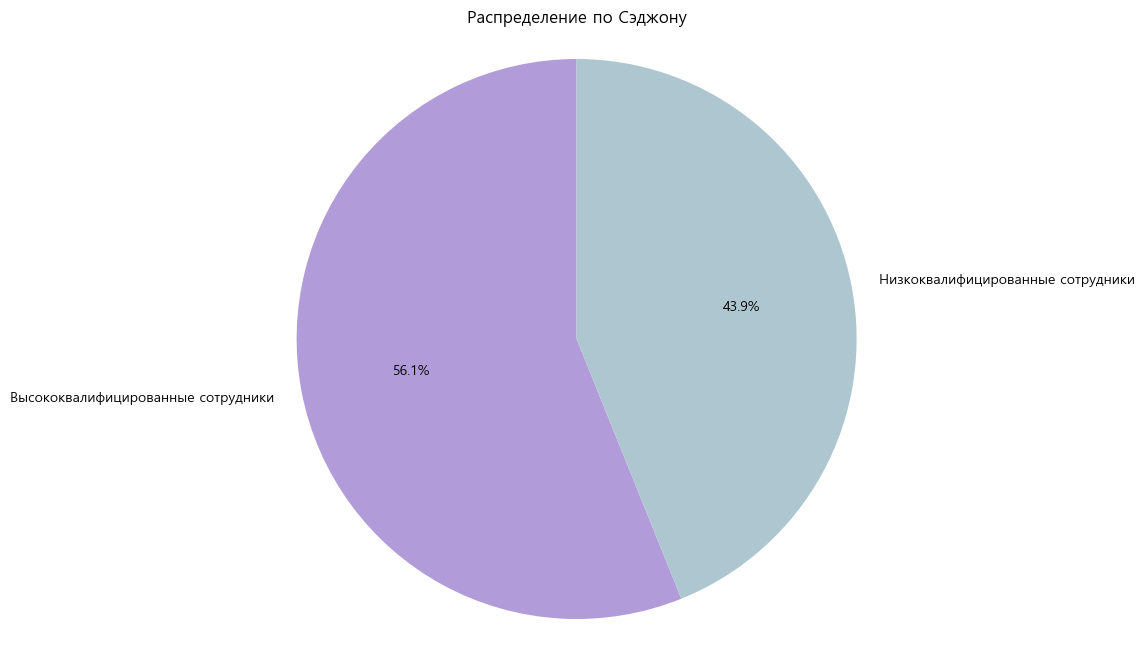

In [16]:
# Общее распределение по стране
totals = [dc_1['E7-01(전문인력)'].sum(), dc_1['E7-02(준전문인력)'].sum()]
labels = ['Высококвалифицированные сотрудники', 'Низкоквалифицированные сотрудники']
colors = ['#B19CD9', '#AEC6CF']

plt.figure(figsize=(10, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Распределение по Сэджону')
plt.axis('equal')
plt.show()

#E7-01(전문인력), E7-02(준전문인력), E7-03(일반기능인력), E7-04(숙련기능인력)

Выводы:
1/ Наибольшее число иностранцев работает в провинции Кёнгидо, и только потом следует столица Сеул.
2/ Наименьшее число иностранцев задействовано в выосокотехнологичном городе Сэджон.

Построим тепловую карты для оценки распределения профессий по городам.

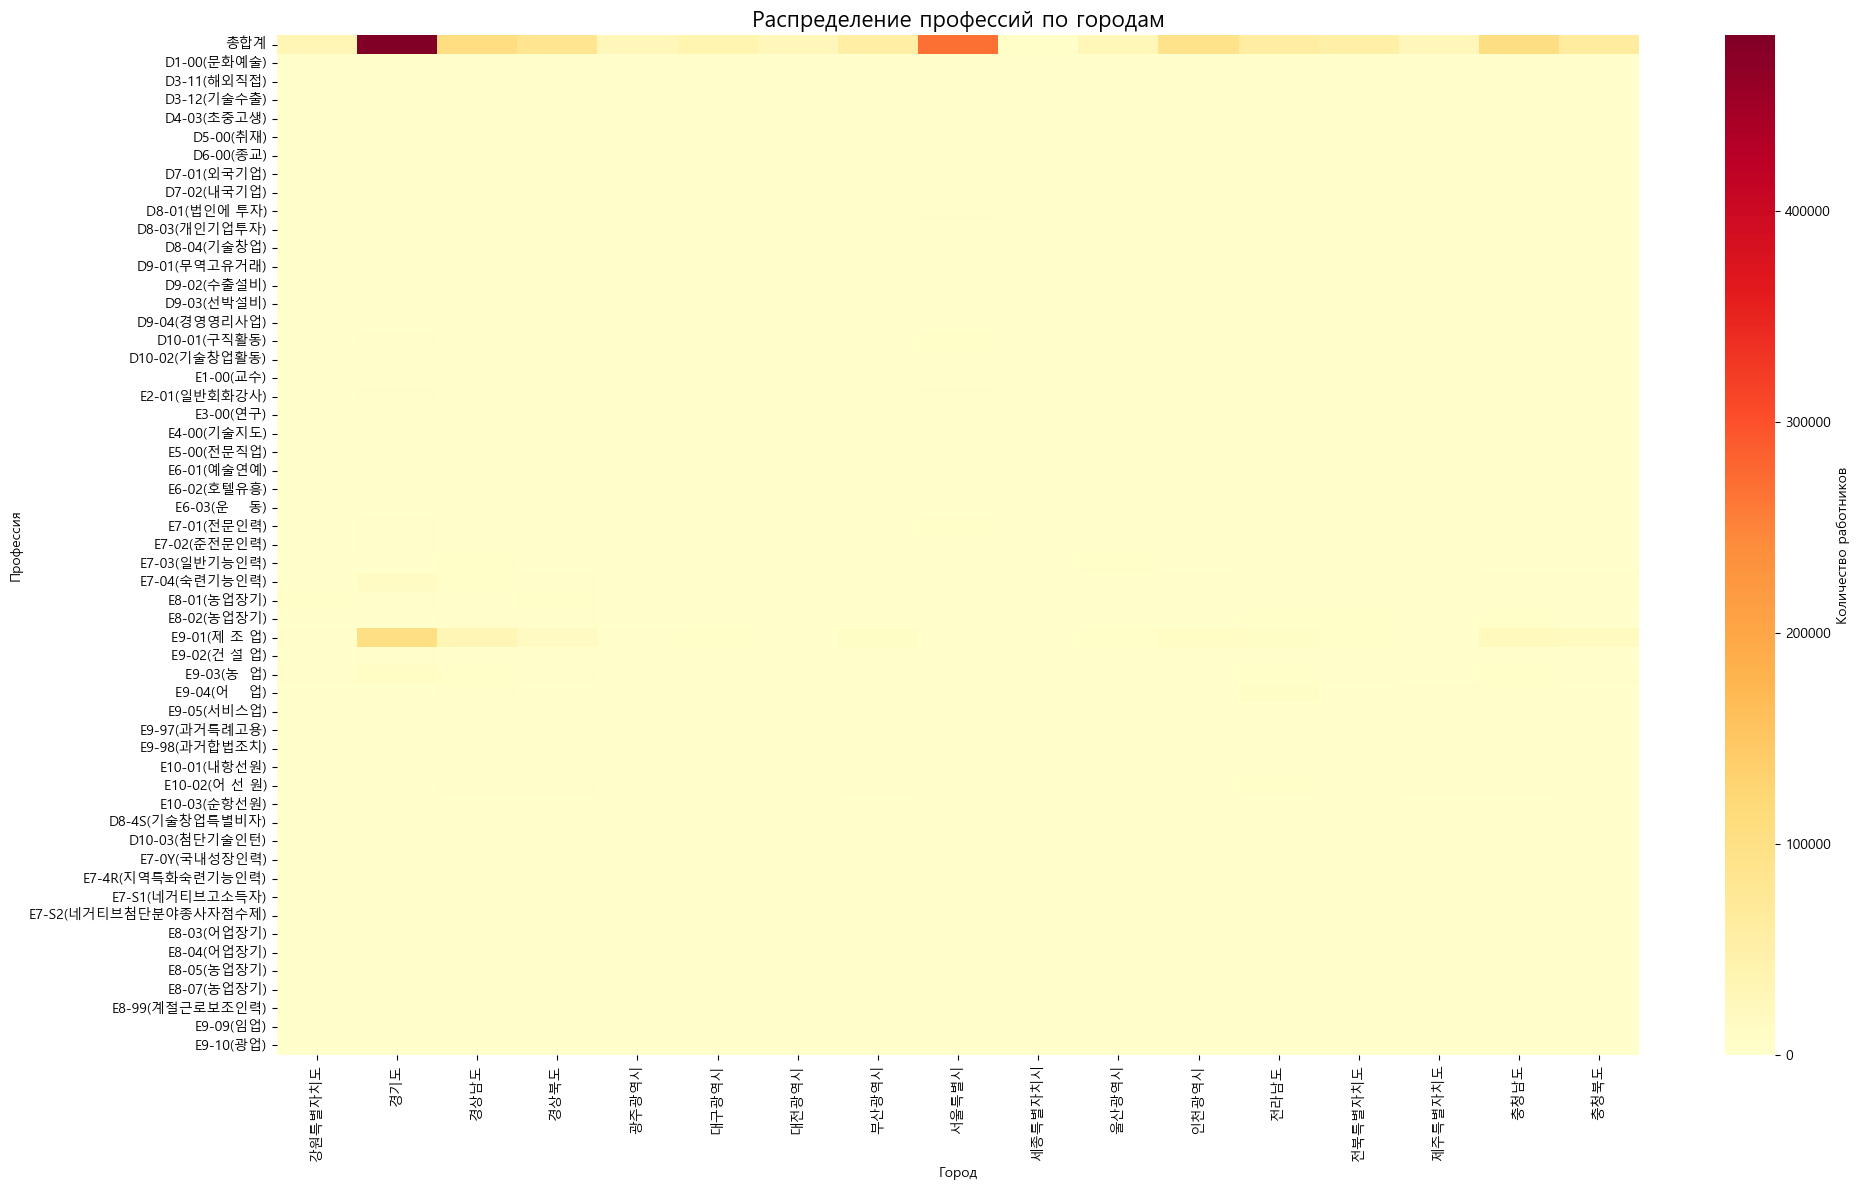

In [17]:
import seaborn as sns

# Настройка размера для 56 столбцов
plt.figure(figsize=(20, 12))

# Создаем тепловую карту
sns.heatmap(dc_1.set_index('시도').T,  # .T - транспонируем, чтобы профессии были по вертикали
            cmap='YlOrRd',
            annot=False,  # Не показывать числа (слишком много)
            fmt='.0f',
            cbar_kws={'label': 'Количество работников'})
plt.title('Распределение профессий по городам', fontsize=16)
plt.xlabel('Город')
plt.ylabel('Профессия')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Можно сделать вывод, что особого разделения не наблюдается. Единственное исключение -- почти во всех городах наблюдается небольшое превышение иностранце на производствах.

Теперь посмотрим распределение иностранцев по национальному и международному бизнесам.

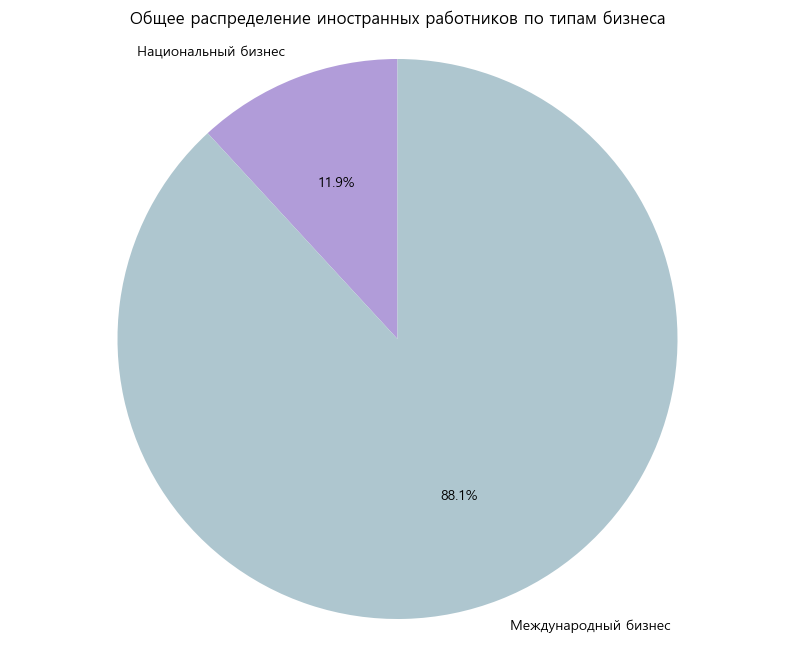

In [18]:
# Общее распределение по стране
totals = [dc_1['D7-02(내국기업)'].sum(), dc_1['D7-01(외국기업)'].sum()]
labels = ['Национальный бизнес', 'Международный бизнес']
colors = ['#B19CD9', '#AEC6CF']

plt.figure(figsize=(10, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Общее распределение иностранных работников по типам бизнеса')
plt.axis('equal')
plt.show()

Делаем вывод, что корейские компании неохотно принимают на работу иностранцев, что подвтерждается рядом аналитических статей. 

E7-01(전문인력), E7-02(준전문인력), E7-03(일반기능인력), E7-04(숙련기능인력): Каково отношение специализированного и квалифицированного персонала и общей и квалифицированной рабочей силы?

<Figure size 1600x1000 with 0 Axes>

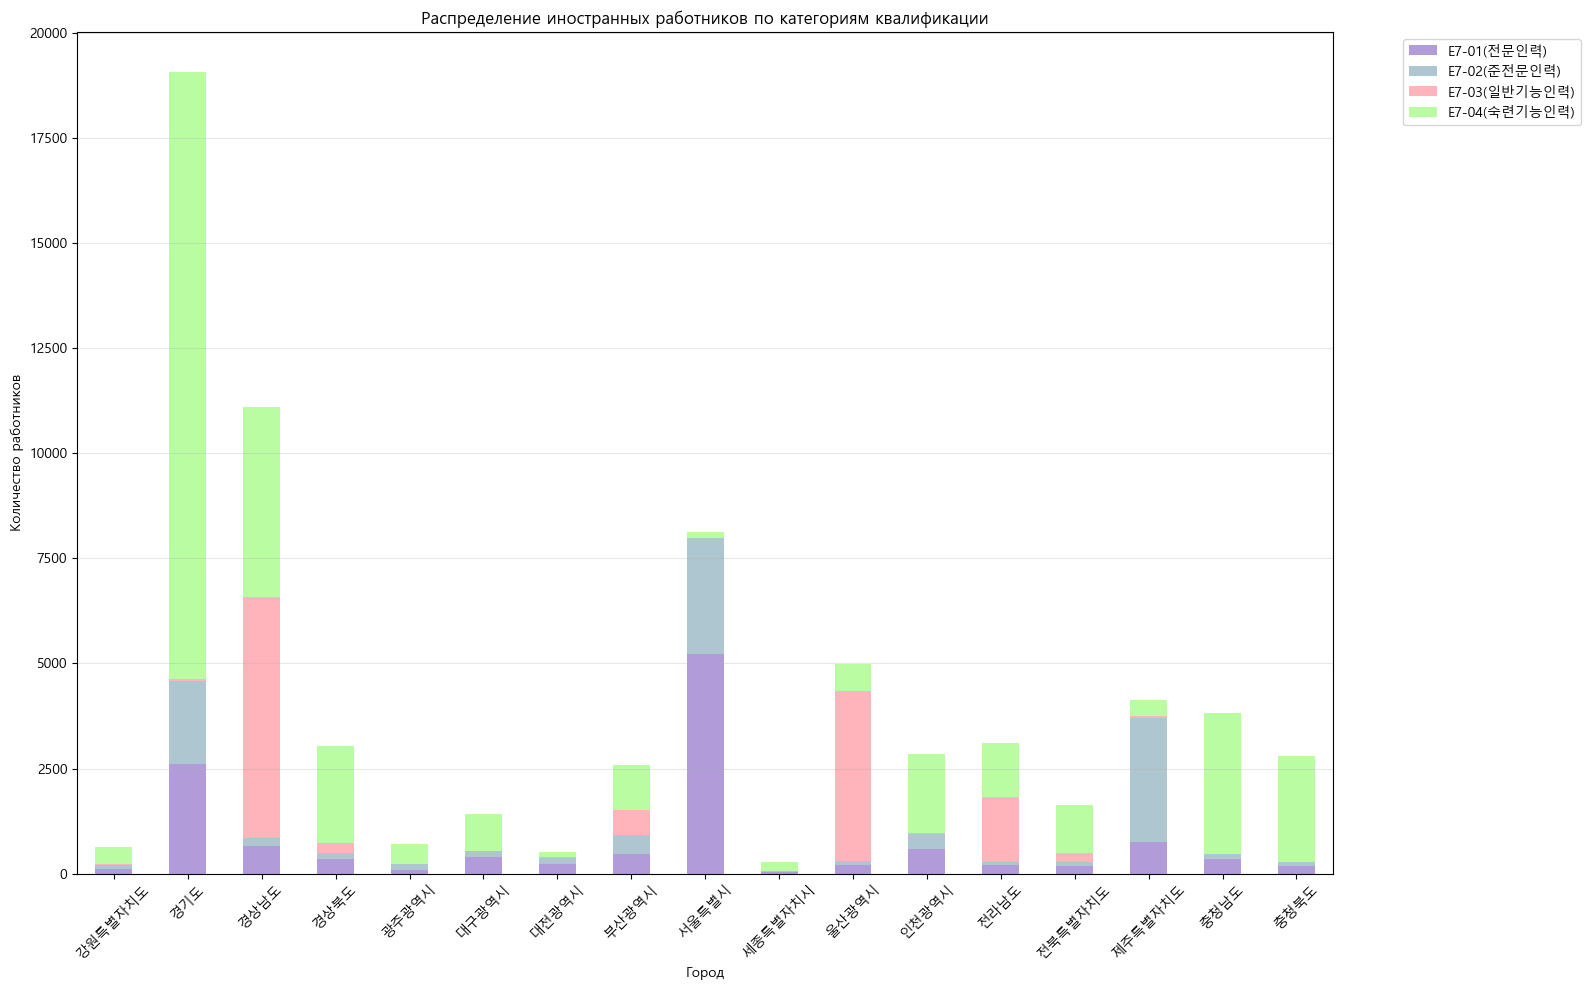

In [19]:
categories = ['E7-01(전문인력)', 'E7-02(준전문인력)', 'E7-03(일반기능인력)', 'E7-04(숙련기능인력)']

# Пастельные цвета для четырех категорий
pastel_colors = ['#B19CD9', '#AEC6CF', '#FFB3BA', '#BAFCA2']

plt.figure(figsize=(16, 10))
dc_1.set_index('시도')[categories].plot(kind='bar', stacked=True, 
                                      color=pastel_colors, figsize=(16, 10))
plt.title('Распределение иностранных работников по категориям квалификации')
plt.ylabel('Количество работников')
plt.xlabel('Город')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Во многих провинциях значительную часть рынка рабочей силы среди иностранцев представляют квалифицированные работники.

Однако наблюдается повышенное количество общей рабочей силы в таких провинциях, как Кёнсан-Намдо, Чолла-Намдо и г. Уольсан, которые традиционно являются промышленными районами.

Наибольшая же часть специализированных работников наблюдается в Сеуле и провинции Кёнгидо.

***Практика***

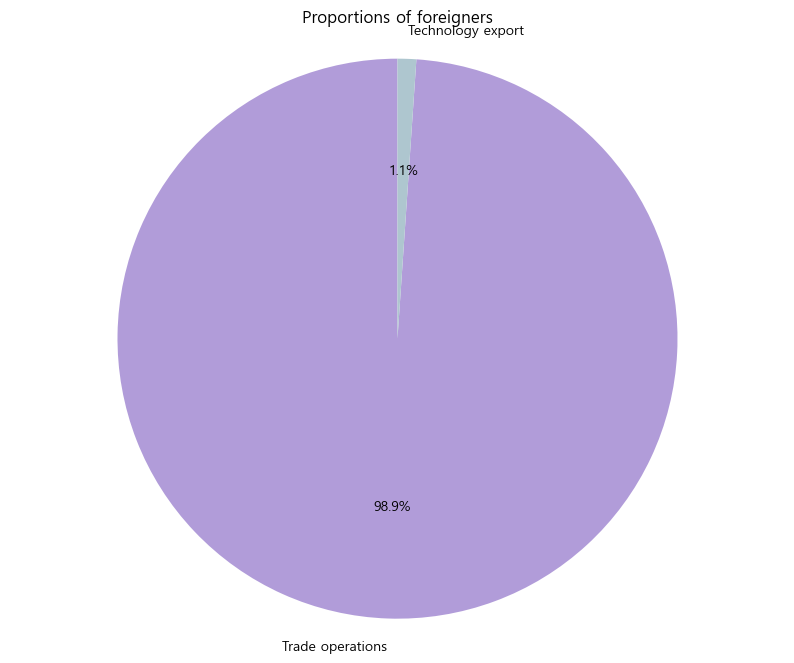

In [27]:
# Общее распределение по стране
totals = [dc_1['D9-01(무역고유거래)'].sum(), dc_1['D3-12(기술수출)'].sum()]

labels = ['Trade operations', 'Technology export']
colors = ['#B19CD9', '#AEC6CF']

plt.figure(figsize=(10, 8))
plt.pie(totals, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportions of foreigners')
plt.axis('equal')
plt.show()


<Axes: xlabel='D7-02(내국기업)', ylabel='D7-01(외국기업)'>

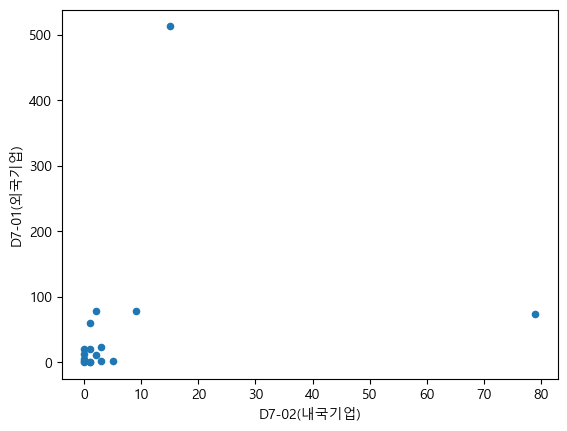

In [24]:
dc_1.plot('D7-02(내국기업)', 'D7-01(외국기업)', kind = "scatter")